# Run Persistence Method on Dataset to get baseline metrics

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import torch
from models.persistence import Persistence
import numpy as np
import matplotlib.pyplot as plt


In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"using device: {device}")


using device: cuda


In [4]:
persistence = Persistence(device)


In [5]:
DATASET_PATH = "../datasets/goes16/salto/"


## Run on 60 minutes time horizon

In [6]:
TIME_HORIZON = 60

persistence.create_dataloaders(
    dataset="goes16",
    path=DATASET_PATH,
    time_horizon=TIME_HORIZON
)

metrics_60 = persistence.evaluate(dataset="val")
print(metrics_60)


INFO:GOES16Dataset:Number of sequences filtered: 519
INFO:GOES16Dataset:Number of sequences filtered by black images: 1
INFO:GOES16Dataset:Number of sequences filtered: 166
INFO:GOES16Dataset:Number of sequences filtered by black images: 1
INFO:Persistence:Train loader size: 24305
INFO:Persistence:Val loader size: 4894
INFO:Persistence:Samples height: 1024, Samples width: 1024
INFO:Persistence:Evaluating model on validation set
100%|███████████████████████████████████████████████████████████████████████████████| 4894/4894 [06:23<00:00, 12.75it/s]


{'mae': tensor(0.0833), 'rmse': tensor(0.1338), 'r_mae': tensor(31.7656, dtype=torch.float16), 'r_mae_pw': tensor(35.1875, dtype=torch.float16), 'r_rmse': tensor(55.3750, dtype=torch.float16), 'r_rmse_pw': tensor(26.8281, dtype=torch.float16)}


## Run on 120 minutes time horizon

In [7]:
TIME_HORIZON = 120

persistence.create_dataloaders(
    dataset="goes16",
    path=DATASET_PATH,
    time_horizon=TIME_HORIZON
)

metrics_120 = persistence.evaluate(dataset="val")
print(metrics_120)


INFO:GOES16Dataset:Number of sequences filtered: 615
INFO:GOES16Dataset:Number of sequences filtered by black images: 1
INFO:GOES16Dataset:Number of sequences filtered: 203
INFO:GOES16Dataset:Number of sequences filtered by black images: 1
INFO:Persistence:Train loader size: 21330
INFO:Persistence:Val loader size: 4252
INFO:Persistence:Samples height: 1024, Samples width: 1024
INFO:Persistence:Evaluating model on validation set
100%|███████████████████████████████████████████████████████████████████████████████| 4252/4252 [07:47<00:00,  9.09it/s]


{'mae': tensor(0.1021), 'rmse': tensor(0.1563), 'r_mae': tensor(39.4375, dtype=torch.float16), 'r_mae_pw': tensor(45.1875, dtype=torch.float16), 'r_rmse': tensor(64.6875, dtype=torch.float16), 'r_rmse_pw': tensor(31.7344, dtype=torch.float16)}


## Run on 180 minutes time horizon

In [8]:
TIME_HORIZON = 180

persistence.create_dataloaders(
    dataset="goes16",
    path=DATASET_PATH,
    time_horizon=TIME_HORIZON
)

metrics_180 = persistence.evaluate(dataset="val")
print(metrics_180)


INFO:GOES16Dataset:Number of sequences filtered: 630
INFO:GOES16Dataset:Number of sequences filtered by black images: 1
INFO:GOES16Dataset:Number of sequences filtered: 224
INFO:GOES16Dataset:Number of sequences filtered by black images: 0
INFO:Persistence:Train loader size: 18442
INFO:Persistence:Val loader size: 3634
INFO:Persistence:Samples height: 1024, Samples width: 1024
INFO:Persistence:Evaluating model on validation set
100%|███████████████████████████████████████████████████████████████████████████████| 3634/3634 [05:36<00:00, 10.80it/s]


{'mae': tensor(0.1155), 'rmse': tensor(0.1718), 'r_mae': tensor(44.7500, dtype=torch.float16), 'r_mae_pw': tensor(51.7812, dtype=torch.float16), 'r_rmse': tensor(70.8125, dtype=torch.float16), 'r_rmse_pw': tensor(34.7812, dtype=torch.float16)}


## Run on 240 minutes time horizon

In [9]:
TIME_HORIZON = 240

persistence.create_dataloaders(
    dataset="goes16",
    path=DATASET_PATH,
    time_horizon=TIME_HORIZON
)

metrics_240 = persistence.evaluate(dataset="val")
print(metrics_240)


INFO:GOES16Dataset:Number of sequences filtered: 604
INFO:GOES16Dataset:Number of sequences filtered by black images: 1
INFO:GOES16Dataset:Number of sequences filtered: 217
INFO:GOES16Dataset:Number of sequences filtered by black images: 0
INFO:Persistence:Train loader size: 15616
INFO:Persistence:Val loader size: 3048
INFO:Persistence:Samples height: 1024, Samples width: 1024
INFO:Persistence:Evaluating model on validation set
100%|███████████████████████████████████████████████████████████████████████████████| 3048/3048 [07:53<00:00,  6.44it/s]


{'mae': tensor(0.1246), 'rmse': tensor(0.1825), 'r_mae': tensor(48.1562, dtype=torch.float16), 'r_mae_pw': tensor(55.3750, dtype=torch.float16), 'r_rmse': tensor(74.6250, dtype=torch.float16), 'r_rmse_pw': tensor(36.5312, dtype=torch.float16)}


## Run on 300 minutes time horizon

In [10]:
TIME_HORIZON = 300

persistence.create_dataloaders(
    dataset="goes16",
    path=DATASET_PATH,
    time_horizon=TIME_HORIZON
)

metrics_300 = persistence.evaluate(dataset="val")
print(metrics_300)


INFO:GOES16Dataset:Number of sequences filtered: 498
INFO:GOES16Dataset:Number of sequences filtered by black images: 1
INFO:GOES16Dataset:Number of sequences filtered: 167
INFO:GOES16Dataset:Number of sequences filtered by black images: 0
INFO:Persistence:Train loader size: 12914
INFO:Persistence:Val loader size: 2520
INFO:Persistence:Samples height: 1024, Samples width: 1024
INFO:Persistence:Evaluating model on validation set
100%|███████████████████████████████████████████████████████████████████████████████| 2520/2520 [06:03<00:00,  6.93it/s]


{'mae': tensor(0.1338), 'rmse': tensor(0.1929), 'r_mae': tensor(51.0625, dtype=torch.float16), 'r_mae_pw': tensor(58.8750, dtype=torch.float16), 'r_rmse': tensor(77.6250, dtype=torch.float16), 'r_rmse_pw': tensor(38.2812, dtype=torch.float16)}


## Plot results


In [16]:
# Validation

metrics_60 = {'mae': torch.tensor(0.0833), 'rmse': torch.tensor(0.1338), 'r_mae': torch.tensor(31.7656, dtype=torch.float16), 'r_mae_pw': torch.tensor(35.1875, dtype=torch.float16), 'r_rmse': torch.tensor(55.3750, dtype=torch.float16), 'r_rmse_pw': torch.tensor(26.8281, dtype=torch.float16)}
metrics_120 = {'mae': torch.tensor(0.1021), 'rmse': torch.tensor(0.1563), 'r_mae': torch.tensor(39.4375, dtype=torch.float16), 'r_mae_pw': torch.tensor(45.1875, dtype=torch.float16), 'r_rmse': torch.tensor(64.6875, dtype=torch.float16), 'r_rmse_pw': torch.tensor(31.7344, dtype=torch.float16)}
metrics_180 = {'mae': torch.tensor(0.1155), 'rmse': torch.tensor(0.1718), 'r_mae': torch.tensor(44.7500, dtype=torch.float16), 'r_mae_pw': torch.tensor(51.7812, dtype=torch.float16), 'r_rmse': torch.tensor(70.8125, dtype=torch.float16), 'r_rmse_pw': torch.tensor(34.7812, dtype=torch.float16)}
metrics_240 = {'mae': torch.tensor(0.1246), 'rmse': torch.tensor(0.1825), 'r_mae': torch.tensor(48.1562, dtype=torch.float16), 'r_mae_pw': torch.tensor(55.3750, dtype=torch.float16), 'r_rmse': torch.tensor(74.6250, dtype=torch.float16), 'r_rmse_pw': torch.tensor(36.5312, dtype=torch.float16)}
metrics_300 = {'mae': torch.tensor(0.1338), 'rmse': torch.tensor(0.1929), 'r_mae': torch.tensor(51.0625, dtype=torch.float16), 'r_mae_pw': torch.tensor(58.8750, dtype=torch.float16), 'r_rmse': torch.tensor(77.6250, dtype=torch.float16), 'r_rmse_pw': torch.tensor(38.2812, dtype=torch.float16)}


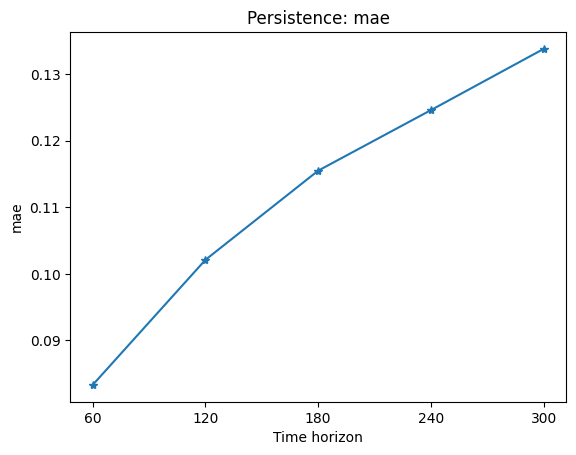

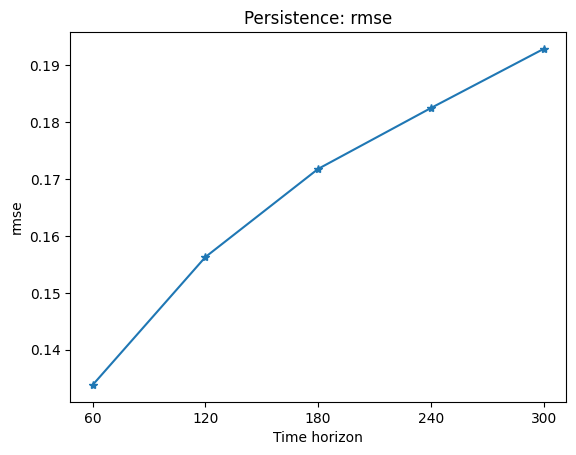

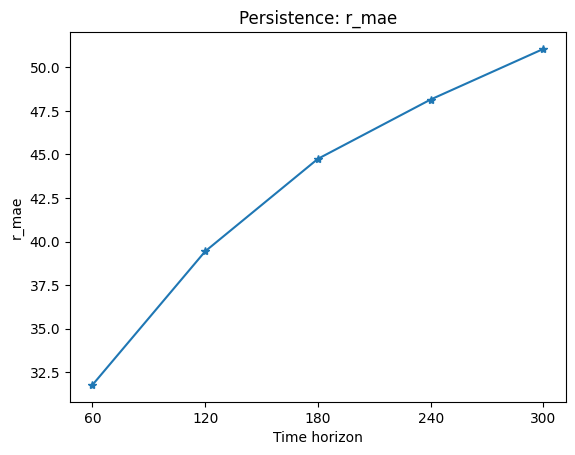

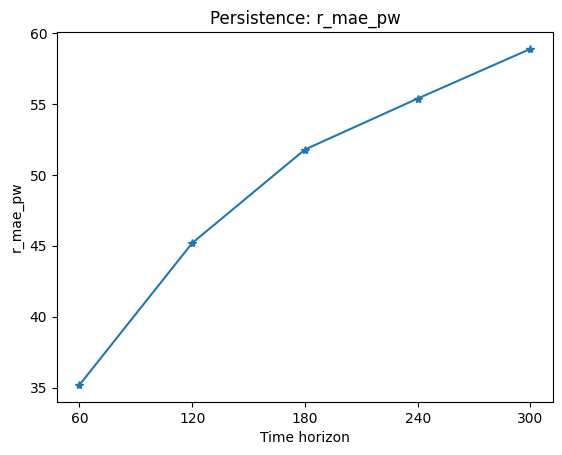

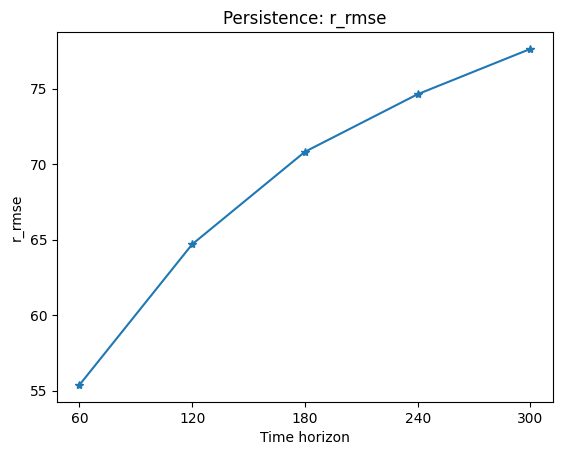

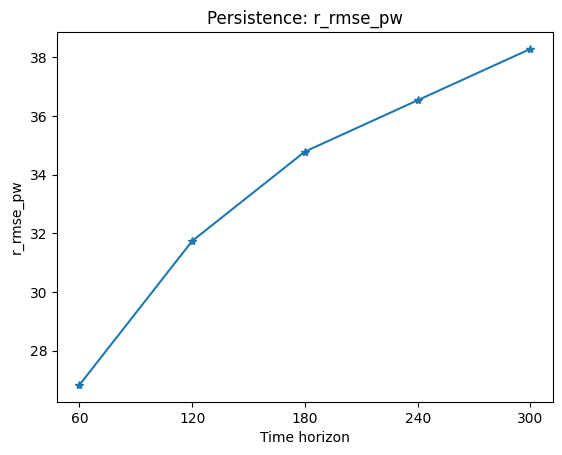

In [15]:
for key in metrics_60:
    values = [metrics_60[key], metrics_120[key], metrics_180[key], metrics_240[key], metrics_300[key]]
    fig, ax = plt.subplots()
    plt.plot([60, 120, 180, 240, 300], values, "*-")
    ax.set_title(f"Persistence: {key}")
    ax.set_ylabel(key)
    ax.set_xlabel("Time horizon")
    ax.set_xticks([60, 120, 180, 240, 300])
    ax.set_xticklabels([60, 120, 180, 240, 300])
    plt.show()
